# tuto MNIST
site : [lien](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(train_labels.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
60000 test samples


In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

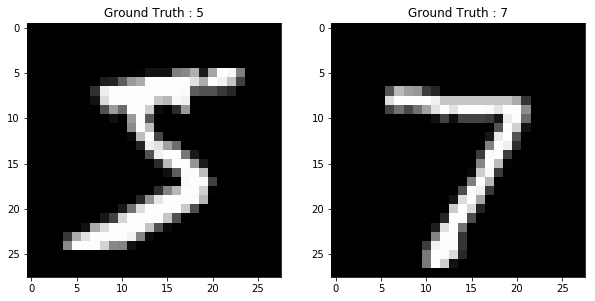

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [6]:
from keras.preprocessing.image import ImageDataGenerator

data_gen_args = dict(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1,
    horizontal_flip=False,
    vertical_flip=False,
    data_format='channels_first')
traingen = ImageDataGenerator(**data_gen_args)
testgen = ImageDataGenerator(**data_gen_args)

train_images4d = train_images.reshape(train_images.shape[0], 1, 28, 28)
test_images4d = test_images.reshape(test_images.shape[0], 1, 28, 28)

traingen.fit(train_images4d)
testgen.fit(test_images4d)



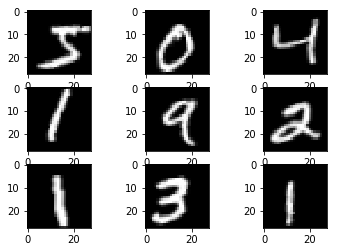

In [7]:
for X_batch, y_batch in traingen.flow(train_images4d, train_labels, batch_size=9, shuffle = False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    # show the plot
    plt.show()
    break
    

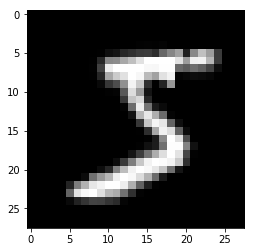

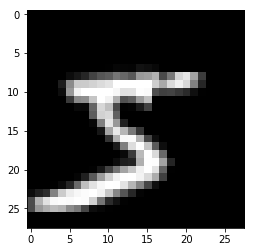

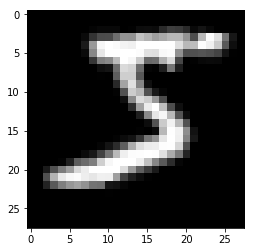

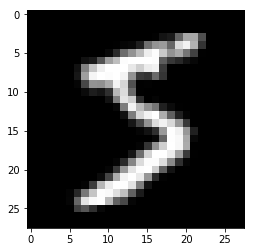

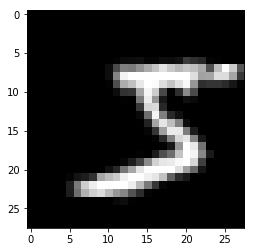

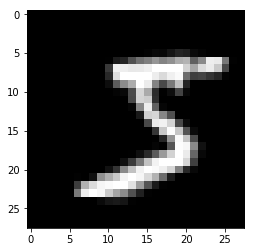

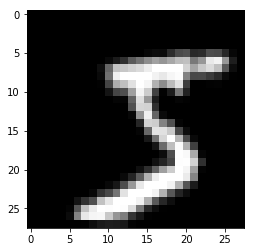

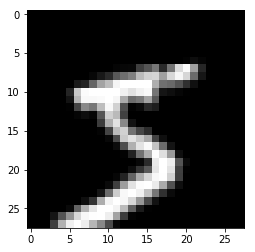

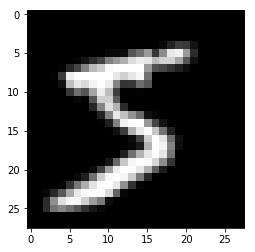

In [10]:
for i in range(9):
    for X_batch, y_batch in traingen.flow(train_images4d, train_labels, batch_size=1, shuffle = False):
        # create a grid of 3x3 images
        #plt.subplot(190 + 1 + i)
        plt.imshow(X_batch[0].reshape(28, 28), cmap='gray')
        plt.show()
        break
    

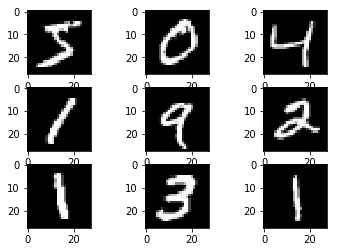

In [11]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap='gray')
# show the plot
plt.show()

In [24]:
X_batch.shape, train_images4d.shape

((9, 1, 28, 28), (60000, 1, 28, 28))

In [15]:
print(train_images4d[0,:,:,:].shape)
print(train_images4d[0:1,:,:,:].shape)
print(train_images4d[0:1].shape)

(1, 28, 28)
(1, 1, 28, 28)
(1, 1, 28, 28)


In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(train_images[0,:,:], cmap='gray')

In [12]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2771 - acc: 0.9152 - val_loss: 0.1159 - val_acc: 0.9634
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0913 - acc: 0.9716 - val_loss: 0.1297 - val_acc: 0.9598
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0791 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0412 - acc: 0.9866 - val_loss: 0.0727 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0684 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0765 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0161 - acc: 0.9951 - val_loss: 0.0888 - val_acc

dans le tuto :
```
Evaluation result on Test Data : Loss = 0.135059975359, accuracy = 0.9807
```

In [15]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 74us/step
Evaluation result on Test Data : Loss = 0.12083245050823566, accuracy = 0.9825


Text(0.5,1,'Accuracy Curves')

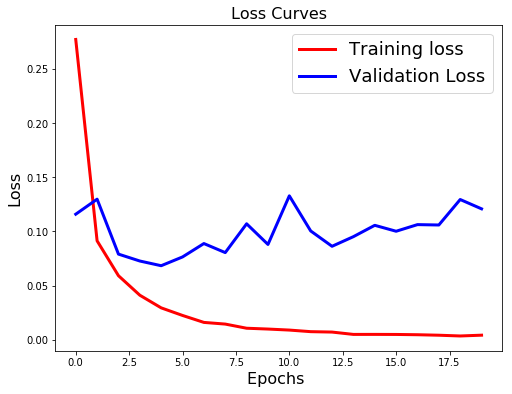

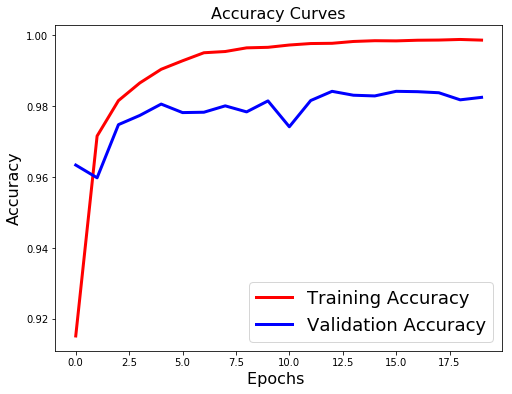

In [16]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

même chose en desactivant des neurones

In [18]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3726 - acc: 0.8847 - val_loss: 0.1512 - val_acc: 0.9500
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1677 - acc: 0.9492 - val_loss: 0.0961 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1317 - acc: 0.9606 - val_loss: 0.0869 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1089 - acc: 0.9666 - val_loss: 0.0748 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0980 - acc: 0.9712 - val_loss: 0.0812 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0887 - acc: 0.9738 - val_loss: 0.0763 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0811 - acc: 0.9766 - val_loss: 0.0727 - val_acc

Text(0.5,1,'Accuracy Curves')

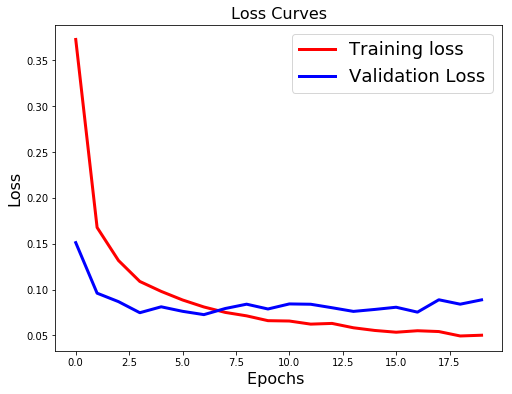

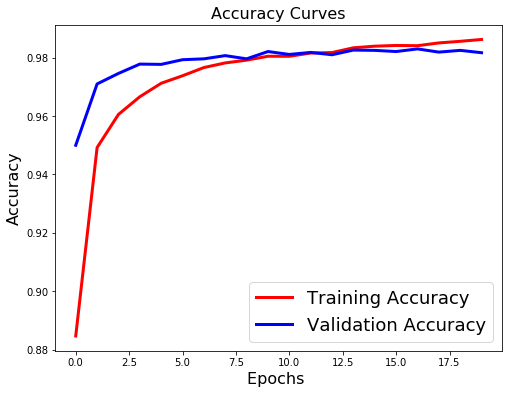

In [19]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
print(model_reg.metrics_names)
model_reg.evaluate(x=test_data, y=test_labels_one_hot)

['loss', 'acc']
10000/10000 [==============================] - 1s 78us/step


[0.08881026745701365, 0.9817]

In [33]:
model.model.history.history['val_acc']

[0.9634,
 0.9598,
 0.9748,
 0.9774,
 0.9806,
 0.9782,
 0.9783,
 0.9801,
 0.9784,
 0.9815,
 0.9742,
 0.9816,
 0.9842,
 0.9831,
 0.9829,
 0.9842,
 0.9841,
 0.9838,
 0.9818,
 0.9825]